# <span style="color:red"> Facial Keypoints Detection </span>
### A computer vision project to build a facial keypoints detection system.
### <span style="color:skyblue"> Notebook 3 of 4: Complete Pipeline </span>

<img src="auxil/images/_project_intro.png" style="margin:auto" width="600"/>

## <span style="color:SteelBlue"> Project Overview </span>

- Facial keypoints detection system has variety of applications, including: 
  - Facial tracking.
  - Facial pose recognition.
  - Facial filters.
  - Emotion recognition.
  - Medical diagnosis: Identifying dysmorphic facial symptoms.
- Detecting facial keypoints is a challenging problem given the variations in both facial features as well as image conditions. Facial features may differ according to size, position, pose and expression, while image qualtiy may vary with illumination and viewing angle.  
- In this project, **Convolutional Neural Network (CNN)** based facial keypoints detector system has been implemented to detect 68 facial keypoints (also called facial landmarks) around important areas of the face: the eyes, corners of the mouth, the nose, etc. using **computer vision techniques** and **deep learning architectures**.  
- The project is broken up into a few main parts in 4 Python notebooks:  
  - [Notebook 1](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/1.%20Load%20and%20Visualize%20Data.ipynb): Loading and Visualizing the Facial Keypoint Data.  
  - [Notebook 2](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/2.%20Define%20the%20Network%20Architecture.ipynb): Defining and Training a Convolutional Neural Network (CNN) to Predict Facial Keypoints.  
  - [Notebook 3](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/3.%20Facial%20Keypoint%20Detection%2C%20Complete%20Pipeline.ipynb): Facial Keypoint Detection Using Haar Cascades and a Trained CNN.  
  - [Notebook 4](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/4.%20Fun%20with%20Keypoints.ipynb): Applications - Facial filters, Face Blur.  
    _(Note: This notebook is Notebook 3.)_
- The implemented Python package code is [facial_keypoints_detecter](https://github.com/ShashankKumbhare/facial-keypoints-detecter/tree/main/facial_keypoints_detecter).  

#### Author: Shashank Kumbhare
email: shashankkumbhare8@gmail.com  
phone: (682) 812-9211  
[LinkedIn](https://www.linkedin.com/in/shashank-kumbhare/)  

[View this project on GitHub](https://github.com/ShashankKumbhare/facial-keypoints-detecter)  
[View package on PyPI]()  
[Link to the implemented package code](https://github.com/ShashankKumbhare/facial-keypoints-detecter/tree/main/facial_keypoints_detecter)

# <span style="color:crimson"> 1. Face and Facial Keypoint detection </span>

After we have trained a neural network to detect facial keypoints, we can then apply this network to _any_ image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, some pre-processing needs to be done.

1. Detect all the faces in an image using a face detector (In our package `facial_keypoints_detecter`, a **Haar Cascade detector** has been used).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that our net expects. This step will be similar to the `data_transform` we created and applied in [Notebook 2](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/2.%20Define%20the%20Network%20Architecture.ipynb), whose job was to rescale, normalize, and turn any image into a Tensor to be accepted as input to our CNN.
3. Use our trained model to detect facial keypoints on the image.

### <span style="color:SteelBlue"> Import resources </span>

- This project utilizes a custom made Python package `facial_keypoints_detecter` created especially for this project.
- `facial_keypoints_detecter` contains a cnn model, pre-processing tools, plotting tools, and datasets loading tools for this project.
- Main libraries used: `PyTorch`, `OpenCV-Python`, `matplotlib`, `pandas`, `numpy`.

In [1]:
import facial_keypoints_detecter as fkd
import matplotlib.pyplot as plt
import torch
import cv2


Importing package 'facial_keypoints_detecter'...
  + Adding module 'auxil'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'data'...
  - Done!
  + Adding module 'model'...
  - Done!
  + Adding module 'preprocessing'...
  - Done!
Package 'facial_keypoints_detecter' imported sucessfully !!
version 1.0.0



### <span style="color:SteelBlue"> Select an image  </span>

Select an image to perform facial keypoint detection.

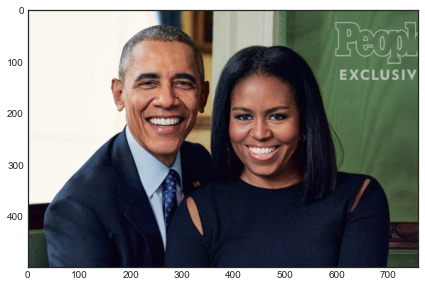

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('auxil/images/obamas.png')

# Switching red and blue color channels >>
# Note: By default OpenCV assumes BLUE comes first, not RED
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plotting the image >>
fig = plt.figure(figsize=(7,7))
_   = plt.imshow(image_rgb)

# <span style="color:crimson"> 2. Loading in a trained model </span>

Once we have an image to work with, the next step is to pre-process that image and feed it into your CNN facial keypoint detector. \
First, load your best model by its filename.

In [3]:
net = fkd.model.Net()
net.load_model('saved_models/20221102_01_elu_3con_1fc_30epoch_batchSize10_cv2_lr0.0001_working.pt')
# net.load_model('saved_models/20221103_02_augmented_dataset_2fc_10epochs_working.pt') # xxx
# net.load_model('saved_models/20221103_03_augmented_dataset_2fc_20epochs.pt')  # xxx
# net.load_model('saved_models/20221103_04_augmented_dataset_2fc_30epochs_batch100.pt')  # xxx
# net.load_model('saved_models/20221103_04_augmented_dataset_1fc_relu_30epochs_batch2000_lr0.0001.pt')  # xxx
# net.load_model('saved_models/20221103_03_augmented_dataset_1fc_elu_30epochs_batch2000_lr0.0001.pt')
# net.load_model('saved_models/20221103_04_augmented_dataset_1fc_elu_30epochs_batch100_lr0.0001.pt')
# net.load_model('saved_models/20221103_05_augmented_dataset_1fc_elu_30epochs_batch32_lr0.0001.pt') # xxx
# net.load_model('saved_models/20221103_06_augmented_dataset_1fc_elu_20epochs_batch32_lr0.0001.pt')  # xxx
net.eval()

Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=86528, out_features=136, bias=True)
)

# <span style="color:crimson"> 3. Detect all faces in an image </span>

`facial_keypoints_detecter` uses OpenCV's pre-trained **Haar Cascade classifiers**, all of which can be found in the [detector_architectures](https://github.com/ShashankKumbhare/facial-keypoints-detecter/tree/main/auxil/detector_architectures) directory, to find any faces in the selected image.

In the code below, we loop over each face in the original image and draw a red square on each face. \

An example of face detection on a variety of images is shown below.

<img src='auxil/images/haar_cascade_ex.png' width=80% height=80%/>


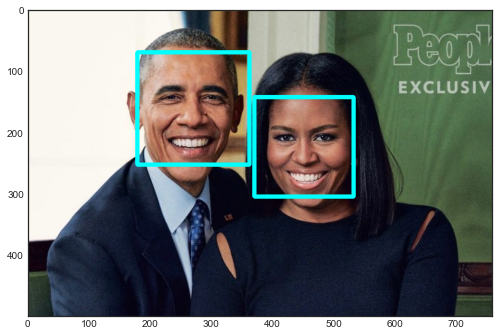

In [4]:
faces = net.apps.detect_faces("auxil/images/obamas.png", plot_enabled = True, figsizeScale = 2.5)

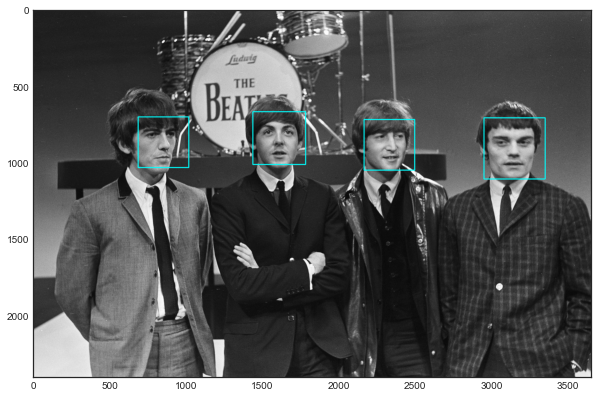

In [5]:
faces = net.apps.detect_faces("auxil/images/the_beatles.png", plot_enabled = True, figsizeScale = 3)

# <span style="color:crimson"> 4. Keypoint detection </span>

Now, we'll loop over each detected face in an image (again!) only this time, we will transform those faces in Tensors that your CNN can accept as input images.

`net.detect_facial_keypoints` detects facial keypoints by performing the following transforms on the input image file:
1. Detects faces.
2. Convert the faces from RGB to grayscale.
3. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255].
4. Rescale the detected face to be the expected square size for your CNN (224x224).
5. Reshape the numpy image into a torch image.

After each face has been appropriately converted into an input Tensor for our network to see as input, we can apply our `net.forward` to each face. \
The ouput should be the predicted facial keypoints. \
These keypoints will need to be "un-normalized" for display, and if we pass argument `plot_enabled = True` to `net.detect_facial_keypoints` it will plot the detected facila keypoints. 

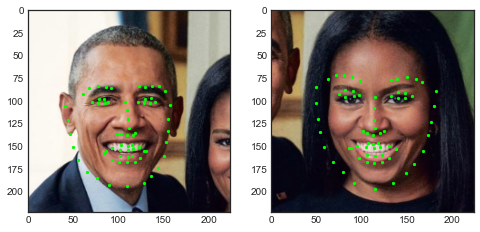

In [6]:
keypoints, images = net.apps.detect_facial_keypoints("auxil/images/obamas.png", plot_enabled = True, figsizeScale=1.2)

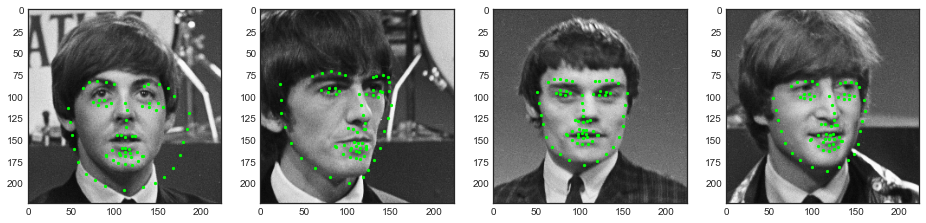

In [7]:
keypoints, images = net.apps.detect_facial_keypoints("auxil/images/the_beatles.png", plot_enabled = True, figsizeScale=1.2)

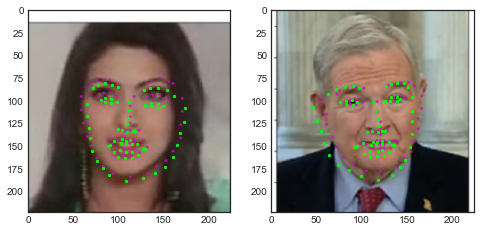

In [8]:
keypoints, images = net.apps.detect_facial_keypoints("auxil/images/key_pts_example.png", plot_enabled = True, figsizeScale=1.2)

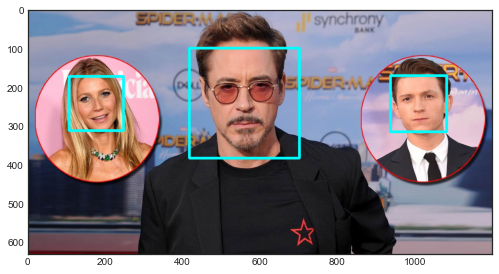

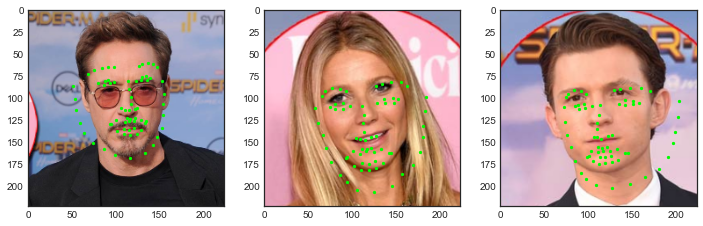

In [9]:
faces = net.apps.detect_faces("auxil/images/robert.png", plot_enabled = True, figsizeScale = 2.5)
keypoints, images = net._detect_facial_keypoints("auxil/images/robert.png", plot_enabled = True, figsizeScale = 1.2)

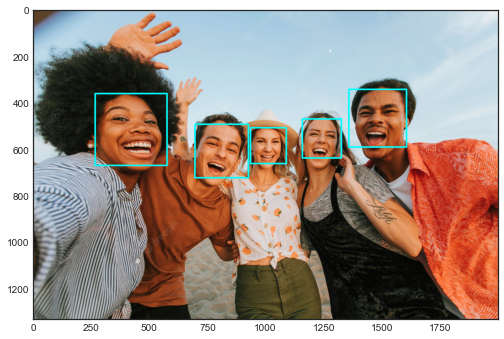

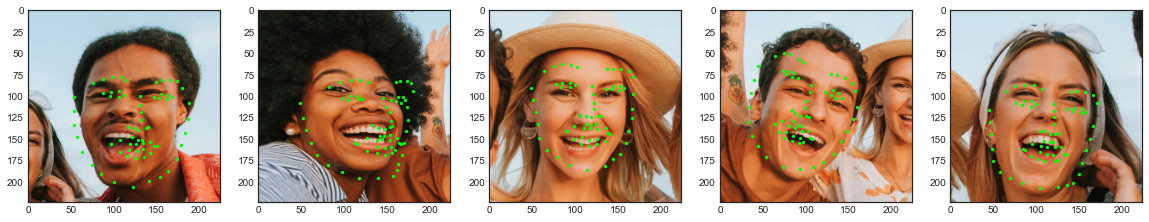

In [10]:
faces = net.apps.detect_faces("auxil/images/group.png", plot_enabled = True, figsizeScale = 2.5)
keypoints, images = net._detect_facial_keypoints("auxil/images/group.png", plot_enabled = True, figsizeScale = 1.2)

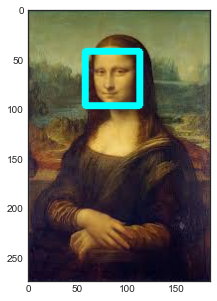

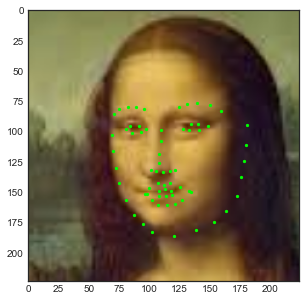

In [11]:
faces = net.apps.detect_faces("auxil/images/mona_lisa.png", plot_enabled = True, figsizeScale = 1.5)
keypoints, images = net._detect_facial_keypoints("auxil/images/mona_lisa.png", plot_enabled = True, figsizeScale = 1.5)

## <span style="color:orange"> Next: Applications - Facial filters, Face Blur! </span>

Now that we have build a complete pipeline for a facial keypoints detection system, we are ready to move on to the 4rd and final notebook [Notebook 4](https://github.com/ShashankKumbhare/facial-keypoints-detecter/blob/main/4.%20Fun%20with%20Keypoints.ipynb), which combines a face detector with our saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!